In [2]:
import pandas as pd; import numpy as np;

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

csv_file = 'https://raw.githubusercontent.com/holoviz/panel/main/examples/assets/occupancy.csv'
data = pd.read_csv(csv_file, parse_dates=['date'], index_col='date')

data.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


In [3]:
import matplotlib as mpl
%matplotlib inline
mpl.use('agg')

from matplotlib.figure import Figure

def mpl_plot(avg, highlight):
    fig = Figure()
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

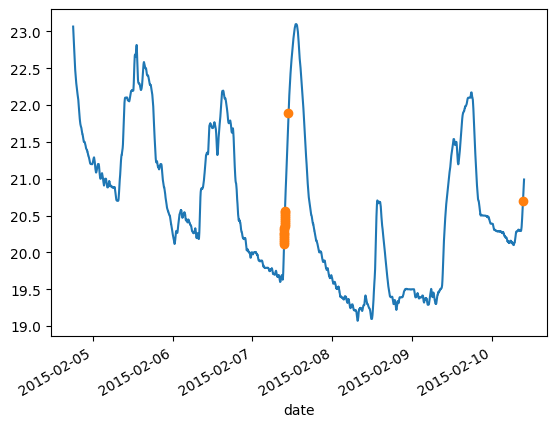

In [4]:
find_outliers(variable='Temperature', window=20, sigma=10)

In [5]:
import panel as pn
pn.extension()

window = pn.widgets.IntSlider(name='window', value=30, start=1, end=60)
sigma = pn.widgets.IntSlider(name='sigma', value=10, start=0, end=20)

interactive = pn.bind(find_outliers, window=window, sigma=sigma)

In [6]:
first_app = pn.Column(window, sigma, interactive)

first_app

BokehModel(combine_events=True, render_bundle={'docs_json': {'59b09029-4cd8-46e4-92b8-a3559b8c14a6': {'defs': …

AttributeError: 'Document' object has no attribute 'apply_json_event'

In [1]:
def model(n=5):
    return "⭐"*n


In [2]:
import panel as pn

pn.extension()

slider = pn.widgets.IntSlider(value=5, start=1, end=5)

interactive_model = pn.bind(model, n=slider)

layout = pn.Column(slider, interactive_model)

In [3]:
layout

BokehModel(combine_events=True, render_bundle={'docs_json': {'fdc56e81-1afb-440f-968e-4b1806452bbd': {'defs': …

AttributeError: 'Document' object has no attribute 'apply_json_event'